In [11]:
library(ggplot2)
library(plyr)

In [7]:
data = read.csv('challenger-data.csv')

In [8]:
head(data)

Observation,Y,X
1,1,53
2,1,53
3,1,53
4,0,53
5,0,53
6,1,57


In [10]:
str(data)

'data.frame':	120 obs. of  3 variables:
 $ Observation: int  1 2 3 4 5 6 7 8 9 10 ...
 $ Y          : int  1 1 1 0 0 1 0 0 0 0 ...
 $ X          : int  53 53 53 53 53 57 57 57 57 57 ...


In [12]:
failures <- subset(data,data$Y==1)
no_failures <- subset(data,data$Y==0)

failures_freq <- count(failures,'X')
no_failures_freq <- count(no_failures,'X')

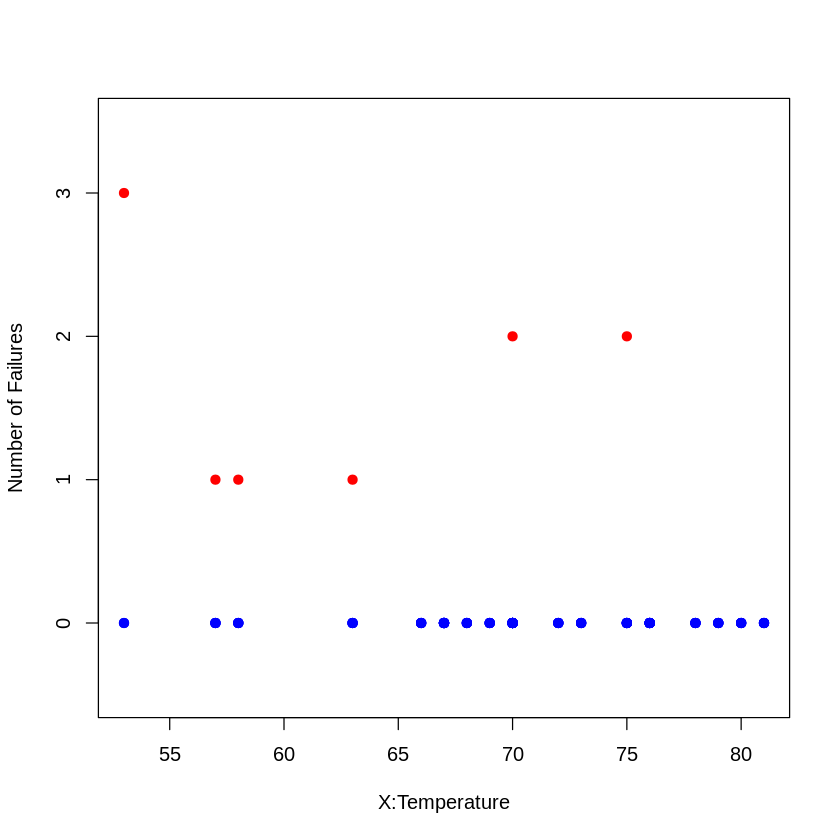

In [15]:
plot(no_failures$X,integer(length(no_failures$X))
     ,ylim=c(-0.5,3.5)
     ,col='blue'
     ,xlab='X:Temperature'
     ,ylab='Number of Failures'
     ,pch=19)

points(failures_freq$X,failures_freq$freq,col='red',pch=19)

In [41]:
model = glm(data$Y ~ data$X,family=binomial(link='logit'),data=data)
summary(model)


Call:
glm(formula = data$Y ~ data$X, family = binomial(link = "logit"), 
    data = data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.0267  -0.4132  -0.3341  -0.2096   2.6900  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)   
(Intercept)  7.40491    3.04084   2.435  0.01489 * 
data$X      -0.14661    0.04723  -3.104  0.00191 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 68.841  on 119  degrees of freedom
Residual deviance: 58.179  on 118  degrees of freedom
AIC: 62.179

Number of Fisher Scoring iterations: 6


In [59]:
x_ <- 36
B0_ <- 7.40491
B1_ <- -0.14661

prob_cat_ <- function(x_){
    probability_1_failure_ <- (exp(B0_ + B1_ * x_)/(1 + exp(B0_ + B1_* x_)))
    probability_5_failures_ <- probability_1_failure_ ^ 5
    return(probability_5_failures_)
}

In [77]:
chart_<-data.frame("temp","prob")
names(chart_)<-c("Temperature","Probability")

chart_ <- ''
for (temp_ in 36:max(data$X)){
    chart_ = rbind(chart_,c(temp_,prob_cat_(temp_)))
}

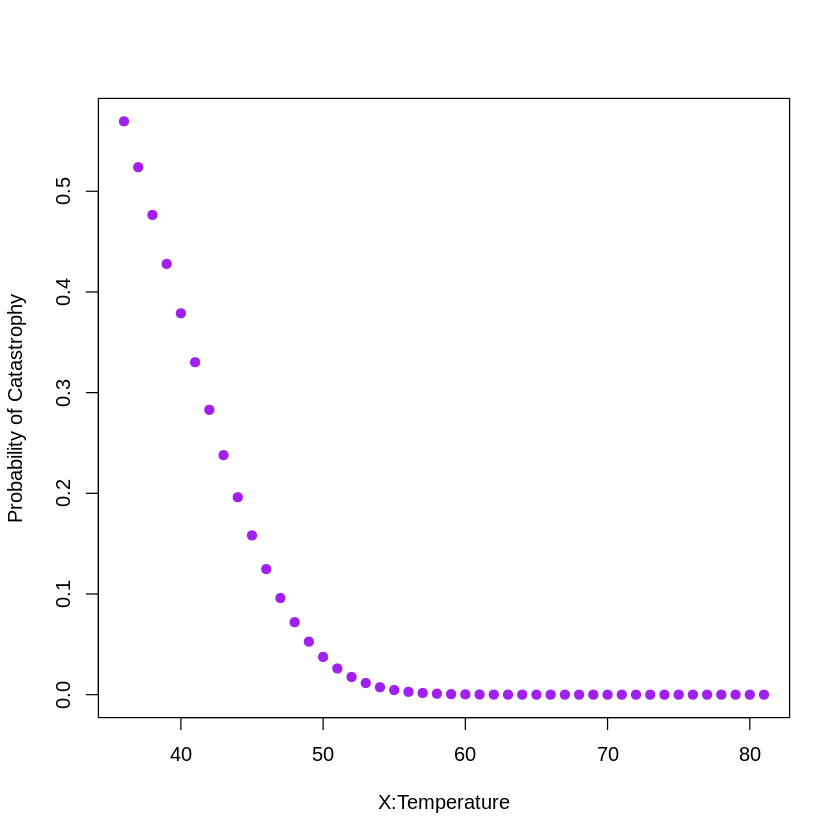

In [81]:
plot((chart_)
     ,col='purple'
     ,xlab='X:Temperature'
     ,ylab='Probability of Catastrophy'
     ,pch=19)